<a href="https://colab.research.google.com/github/Priyagane/Suicide-Rates-Prediction/blob/main/Suicide_Rates_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading of Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/Data_sets/Suicide Rates Prediction/train.csv')
test = pd.read_csv("/content/drive/MyDrive/Data_sets/Suicide Rates Prediction/test.csv")
data = pd.concat([train,test],ignore_index = True)
data.head()

,id,country,year,sex,age,suicides_no,population,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,0,Albania,1987,male,15-24 years,21.0,312900,Albania1987,NaN,"2,156,624,900",796,Generation X
1,1,Albania,1987,male,35-54 years,16.0,308000,Albania1987,NaN,"2,156,624,900",796,Silent
2,2,Albania,1987,female,15-24 years,14.0,289700,Albania1987,NaN,"2,156,624,900",796,Generation X
3,3,Albania,1987,male,75+ years,1.0,21800,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,4,Albania,1987,male,25-34 years,9.0,274300,Albania1987,NaN,"2,156,624,900",796,Boomers


In [2]:
#Printing Dimension of datasets
print("Dimension of train dataset", train.shape)
print("Dimension of test dataset", test.shape)
print("Dimension of data dataset", data.shape)

Dimension of train dataset (18083, 12)
Dimension of test dataset (9737, 11)
Dimension of data dataset (27820, 12)


In [3]:
#Overview of the Final dataset
data.head()

,id,country,year,sex,age,suicides_no,population,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,0,Albania,1987,male,15-24 years,21.0,312900,Albania1987,NaN,"2,156,624,900",796,Generation X
1,1,Albania,1987,male,35-54 years,16.0,308000,Albania1987,NaN,"2,156,624,900",796,Silent
2,2,Albania,1987,female,15-24 years,14.0,289700,Albania1987,NaN,"2,156,624,900",796,Generation X
3,3,Albania,1987,male,75+ years,1.0,21800,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,4,Albania,1987,male,25-34 years,9.0,274300,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
# Datatypes of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  27820 non-null  int64  
 1   country             27820 non-null  object 
 2   year                27820 non-null  int64  
 3   sex                 27820 non-null  object 
 4   age                 27820 non-null  object 
 5   suicides_no         18083 non-null  float64
 6   population          27820 non-null  int64  
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
#Identifing missing Values
data.isna().sum()

id                        0
country                   0
year                      0
sex                       0
age                       0
suicides_no            9737
population                0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [6]:
#Getting the columns name
data.columns

Index(['id', 'country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'country-year', 'HDI for year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [7]:
#Removing the , and space from gdp_for_year ($) column values
data[' gdp_for_year ($) '].replace(',','',regex=True,inplace=True)
data[' gdp_for_year ($) '] = data[' gdp_for_year ($) '].astype(int)

In [8]:
#Checking the datatyoe
data[' gdp_for_year ($) '].dtypes

dtype('int64')

In [9]:
#showing Suicides no by age
age = train.groupby('age')["suicides_no"].sum().sort_values()
age

age
5-14 years       23605
15-24 years     342760
75+ years       352546
25-34 years     461709
55-74 years     801199
35-54 years    1052548
Name: suicides_no, dtype: int64

In [10]:
#Sorting no of suicides by country 
country_suicideno = data.groupby('country').sum().reset_index().sort_values(by='suicides_no')
cs= country_suicideno.tail(10)
cs

,country,id,year,suicides_no,population,HDI for year,gdp_for_year ($),gdp_per_capita ($)
40,Hungary,3570735,621060,73891.0,248644256,77.172,27752377178758,2904716
2,Argentina,287742,744000,82219.0,1035985431,93.552,102023417116356,2944044
47,Kazakhstan,4334148,624780,101546.0,377513869,80.016,24550411843212,1662684
18,Canada,1771146,695652,107561.0,826052183,95.160,317789287278408,10748844
58,Mexico,6230814,744000,111139.0,2772959159,85.584,253074490777572,2655504
44,Italy,4826142,744000,132060.0,1715043704,100.176,551211574657860,9896160
15,Brazil,1620990,744000,226613.0,4856093548,83.388,380392678044552,2266032
35,Germany,3078036,624780,291262.0,2024875612,95.232,855576699034428,10971240
33,France,3335580,719820,329127.0,1670756775,101.832,641229863685516,11333328
46,Japan,5040414,744000,806902.0,3681024844,103.356,1614190108454592,13539888


<BarContainer object of 10 artists>

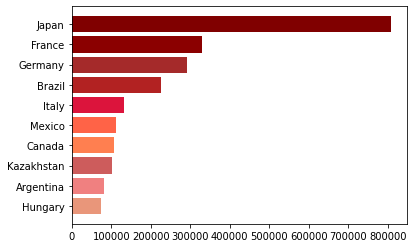

In [11]:
#Ploting the bar no of suicides by country 
plt.barh(cs.country,cs.suicides_no,color=['#E9967A','#F08080','#CD5C5C','#FF7F50','#FF6347','#DC143C','#B22222','#A52A2A','#8B0000','#800000'])


In [12]:
#Encoding the object datatype columns
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
object_values = ['country', 'sex','age','generation'] 
dataset=data.copy()
for i in object_values:

  dataset[i]=lb.fit_transform(dataset[i])

In [13]:
#Dropping unwanted columns
dataset = dataset.drop(columns=['HDI for year','country-year'],axis=1)

In [14]:
#Checking the datatype
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  27820 non-null  int64  
 1   country             27820 non-null  int64  
 2   year                27820 non-null  int64  
 3   sex                 27820 non-null  int64  
 4   age                 27820 non-null  int64  
 5   suicides_no         18083 non-null  float64
 6   population          27820 non-null  int64  
 7    gdp_for_year ($)   27820 non-null  int64  
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 2.1 MB


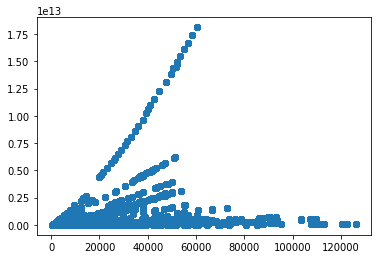

In [15]:
#Scatter plot of GDP per capita and GDP for year
plt.scatter(dataset['gdp_per_capita ($)'],dataset[' gdp_for_year ($) '])

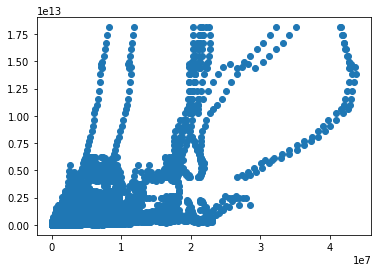

In [16]:
#Scatter plot of Popluation adn GDP for years
plt.scatter(dataset['population'],dataset[' gdp_for_year ($) '])

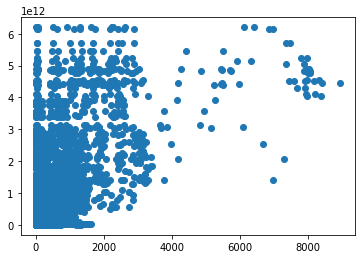

In [17]:
plt.scatter(dataset['suicides_no'],dataset[' gdp_for_year ($) '])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


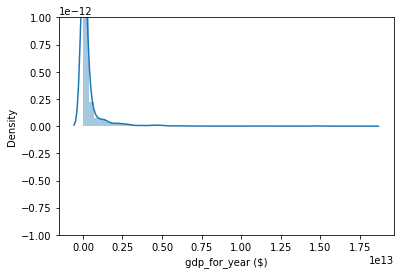

In [20]:
#Distribution plot of GDF for years
import seaborn as sns
sns.distplot(dataset[' gdp_for_year ($) '])

In [21]:
#Correlation
data1=dataset.corr()
data1


,id,country,year,sex,age,suicides_no,population,gdp_for_year ($),gdp_per_capita ($),generation
id,1.000000,9.994463e-01,3.369296e-02,-1.872252e-04,3.640991e-06,0.052752,0.158439,1.642768e-01,5.978798e-02,8.969730e-03
country,0.999446,1.000000e+00,2.276923e-02,-5.463705e-15,2.535676e-05,0.050388,0.158896,1.635832e-01,5.334082e-02,6.068990e-03
year,0.033693,2.276923e-02,1.000000e+00,-1.577200e-16,-5.858810e-04,-0.003316,0.008850,9.452857e-02,3.391343e-01,2.683006e-01
sex,-0.000187,-5.463705e-15,-1.577200e-16,1.000000e+00,-1.335911e-18,0.154789,-0.011242,-1.386038e-15,-2.964946e-16,-2.929210e-17
age,0.000004,2.535676e-05,-5.858810e-04,-1.335911e-18,1.000000e+00,0.001318,-0.093361,6.084189e-05,-1.567976e-04,2.148529e-01
suicides_no,0.052752,5.038841e-02,-3.316098e-03,1.547886e-01,1.317898e-03,1.000000,0.612903,6.157911e-01,1.387917e-01,-6.555404e-02
population,0.158439,1.588961e-01,8.850170e-03,-1.124208e-02,-9.336148e-02,0.612903,1.000000,7.106973e-01,8.150986e-02,-6.796261e-02
gdp_for_year ($),0.164277,1.635832e-01,9.452857e-02,-1.386038e-15,6.084189e-05,0.615791,0.710697,1.000000e+00,3.034045e-01,2.125070e-02
gdp_per_capita ($),0.059788,5.334082e-02,3.391343e-01,-2.964946e-16,-1.567976e-04,0.138792,0.081510,3.034045e-01,1.000000e+00,8.289921e-02
generation,0.008970,6.068990e-03,2.683006e-01,-2.929210e-17,2.148529e-01,-0.065554,-0.067963,2.125070e-02,8.289921e-02,1.000000e+00


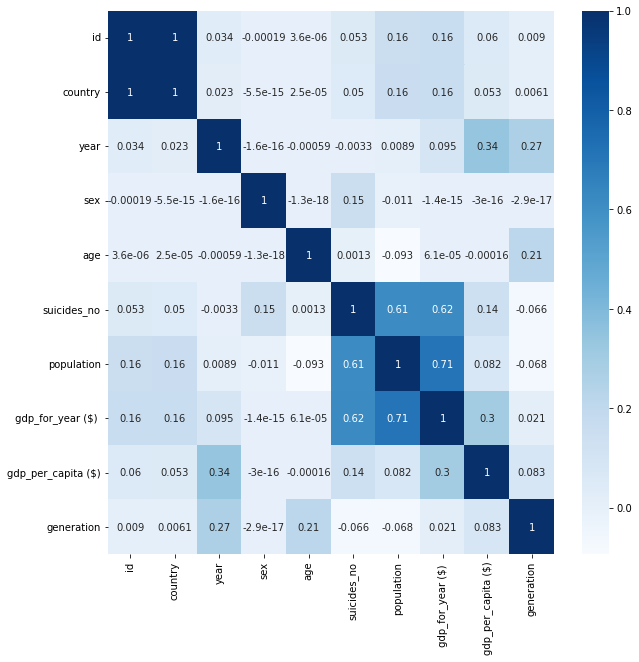

In [22]:
#Heat map for Correlation
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data1,annot=True,cmap='Blues')

In [23]:
#Splting the dataset fot train and test
df_train = dataset[:18083]
df_test = dataset[18083:]

In [24]:
df_test=df_test.drop('suicides_no',axis=1)

In [25]:
#Splitting the train dataset
from sklearn.model_selection import train_test_split
train, Test = train_test_split(df_train, test_size=0.25)

In [26]:
train_x = train.drop(['suicides_no'], axis = 1)
train_y = train['suicides_no']            

test_x = Test.drop(['suicides_no'], axis = 1)
test_y = Test['suicides_no'] 

In [27]:
print('Dimension of train_x dataframe:',train_x.shape)
print('Dimension of train_y dataframe:',train_y.shape)
print('Dimension of test_x dataframe:',test_x.shape)
print('Dimension of test_y dataframe:',test_y.shape)

Dimension of train_x dataframe: (13562, 9)
Dimension of train_y dataframe: (13562,)
Dimension of test_x dataframe: (4521, 9)
Dimension of test_y dataframe: (4521,)


In [28]:
#Traing the model with RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(train_x, train_y)

RandomForestRegressor()

In [29]:
#checking the metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

df_pred = model.predict(test_x)
print('Mean Absolute Error of Ramdom Forest:',mean_absolute_error(df_pred, test_y ))
print('Mean Square Error of Ramdon Forest:', mean_squared_error(df_pred, test_y ))
print('R_Squared Score of Ramdom Forest:', r2_score(df_pred, test_y ))

Mean Absolute Error of Ramdom Forest: 18.155021013050213
Mean Square Error of Ramdon Forest: 3779.140801172307
R_Squared Score of Ramdom Forest: 0.9869386990269906


In [30]:
#Prediction of test data on df_train
pd.DataFrame({'Test':test_y,'Pred':df_pred})

,Test,Pred
4021,0.0,0.18
12154,85.0,89.00
17258,95.0,86.72
14044,108.0,145.48
14164,0.0,0.35
...,...,...
17578,4.0,4.16
10188,1.0,0.10
1422,0.0,0.00
17945,68.0,52.67


In [31]:
compair = pd.DataFrame({
    'y_test':test_y,
    'pred':df_pred
})

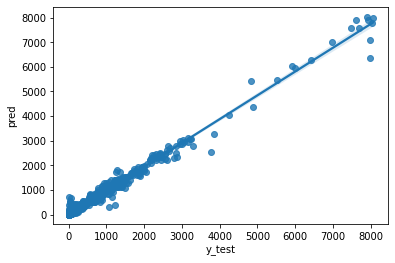

In [32]:
sns.regplot(x='y_test',y='pred',data=compair)

In [33]:
#final prediction on test data
predic_test = model.predict(df_test)
print(predic_test.shape)
print(test.id.shape)
#Create Sample Submission file 
submission_data = pd.DataFrame({'Id':test.id,'Pred_Sucide_no':predic_test})
submission_data


(9737,)
(9737,)


,Id,Pred_Sucide_no
0,18083,4.98
1,18084,32.19
2,18085,134.20
3,18086,57.55
4,18087,73.95
...,...,...
9732,27815,173.99
9733,27816,38.26
9734,27817,57.90
9735,27818,13.93
